In [2]:
import csv
import numpy as np
import pandas as pd
from konlpy.tag import Okt
#df2018=pd.read_pickle("mdata2018.pkl")
#df2018=pd.read_csv("mdata2018.csv")
data2018=pd.read_csv("DTM2018.csv")

In [3]:
df2018=pd.DataFrame(data2018)
df2018=df2018.drop([df2018.columns[0]], axis=1)
df2018.columns

Index(['가가', '가감', '가건물', '가게', '가격', '가격결정', '가격담합', '가격표', '가결', '가계',
       ...
       '힘안', '힘앞', '힘자랑', '힘줄', '힙내세', '힙니', '힙들어', '힙듭니', '힙병', '힙합'],
      dtype='object', length=39600)

In [4]:
dfsum=df2018.sum()
dfsum

가가      119
가감       13
가건물       3
가게      403
가격     1020
       ... 
힙니        4
힙들어       1
힙듭니       3
힙병        1
힙합        2
Length: 39600, dtype: int64

In [5]:
df2018_sum=pd.DataFrame(dfsum)
df2018_sum

,0
가가,119
가감,13
가건물,3
가게,403
가격,1020
...,...
힙니,4
힙들어,1
힙듭니,3
힙병,1


In [6]:
df2018_sum=df2018_sum.T
df2018_sum

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,119,13,3,403,1020,5,7,4,29,72,...,1,3,2,6,1,4,1,3,1,2


In [7]:
col=df2018_sum.columns
col

Index(['가가', '가감', '가건물', '가게', '가격', '가격결정', '가격담합', '가격표', '가결', '가계',
       ...
       '힘안', '힘앞', '힘자랑', '힘줄', '힙내세', '힙니', '힙들어', '힙듭니', '힙병', '힙합'],
      dtype='object', length=39600)

In [44]:
stop="저는 또한 대한 대해 최근 대부분 정말 한번 이제 현재 저희 지금 모든 문제 내용 다시 모두 위해 누구 때문 통해 제발 하나 제대로 해당 당시"
stop_list=stop.split(' ')
drop2018=df2018
def2018=df2018
def stopword(word_list):
    for w in word_list:
        if w in stop_list:
            del drop2018[w]
    return df2018

In [40]:
df2018=df2018.to_numpy()

In [51]:
from math import log
def idf(t):
    df=int(df2018_sum[t])
    return log(1668/(df+1))
idf_list=[]

In [52]:
for t in col:
    idf_list.append(idf(t))

In [53]:
df_idf=pd.DataFrame()

In [54]:
df_idf['idf']=idf_list

In [55]:
df_idf.index=col

In [56]:
df_idf=df_idf.T
df_idf

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
idf,2.631889,4.780323,6.033086,1.417966,0.490843,5.627621,5.339939,5.809943,4.018183,3.128921,...,6.726233,6.033086,6.320768,5.47347,6.726233,5.809943,6.726233,6.033086,6.726233,6.320768


In [60]:
def tfidf(t,d):
    return df2018.loc[d,t]*idf(t)


In [61]:
df_tfidf=pd.DataFrame()

In [62]:
tfidf('가가',0)

0.0

In [ ]:
for t in range(0,1668):
    for d in col:
        df_tfidf.loc[d,t]=tfidf(d,t)
df_tfidf

In [ ]:
df_tfidf_sum=df_tfidf.T
df_tfidf_sum

In [ ]:
df_tfidf_sum=df_tfidf_sum.sum(axis=0)
df_tfidf_sum

In [ ]:
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = WordCloud(font_path='/Library/Fonts/NanumBarunGothicBold.ttf', background_color='white').generate_from_frequencies(dfsum)

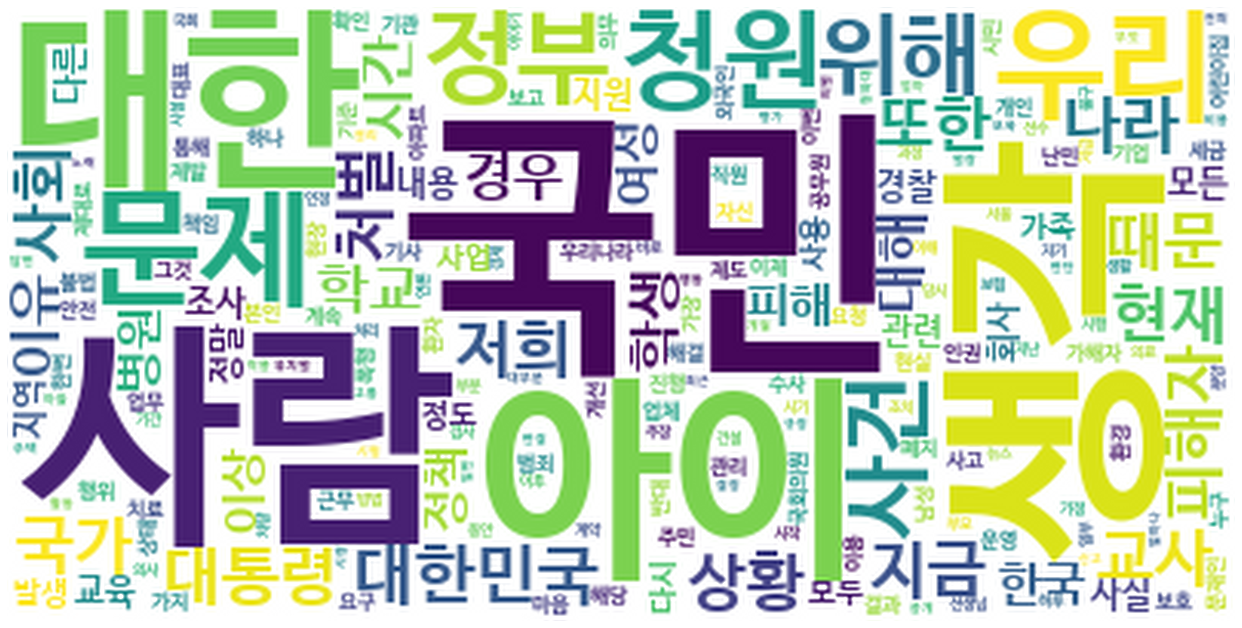

In [34]:
plt.figure(figsize=(22,22))
plt.imshow(cloud, interpolation='lanczos')
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from konlpy.tag import Okt
data2018=pd.read_csv('DTM2018.csv')



In [14]:
data2018=data2018.drop([data2018.columns[0]], axis=1)
data2018


,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
data2018['한국']
    

0        0
1        0
2        0
3        0
4        0
        ..
15719    0
15720    0
15721    1
15722    0
15723    7
Name: 한국, Length: 15724, dtype: int64

In [16]:
for i in range(0,15724):
    data2018['대한민국'][i]=data2018['대한민국'][i]+data2018['한국'][i]


In [17]:
data2018=data2018.drop(['한국'],axis='columns')

In [19]:
df2018_sum=data2018.sum()
data2018=data2018.transpose()
df2018_sum=df2018_sum.T
col=data2018.index
col
    
#df2018_sum=df2018_sum.to_numpy()

RangeIndex(start=0, stop=15724, step=1)

In [20]:
df2018_sum=df2018_sum.to_numpy()

In [22]:
from math import log
def idf(t):
    df=df2018_sum[t]
    return log(15724/(df+1))

In [23]:
data2018

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_tfidf=pd.DataFrame(data2018, index=col)

In [26]:
df_tfidf

,가가,가감,가건물,가게,가격,가격결정,가격담합,가격표,가결,가계,...,힘안,힘앞,힘자랑,힘줄,힙내세,힙니,힙들어,힙듭니,힙병,힙합
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15721,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15722,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
